In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
import warnings        #to ignore warnings
warnings.filterwarnings("ignore") 





In [2]:
#loading the train and test files
train=pd.read_csv(r"C:\Users\Mayor\Desktop\Projects\Loan Prediction Problem\train_ctrUa4K.csv")
test=pd.read_csv(r"C:\Users\Mayor\Desktop\Projects\Loan Prediction Problem\test_lAUu6dG.csv")


train_original=train.copy()
test_original=test.copy()




In [3]:
#viewing the fields and dimensions of the data
train.columns
test.columns

train.dtypes

train.shape
test.shape

(367, 12)

<AxesSubplot:>

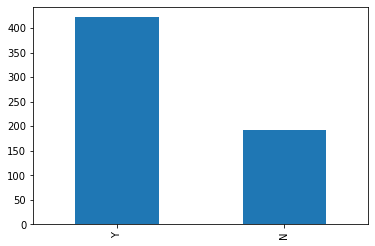

In [4]:
#vizualizing the contents of the Loan_Status field 
train['Loan_Status'].value_counts()
train['Loan_Status'].value_counts().plot.bar()

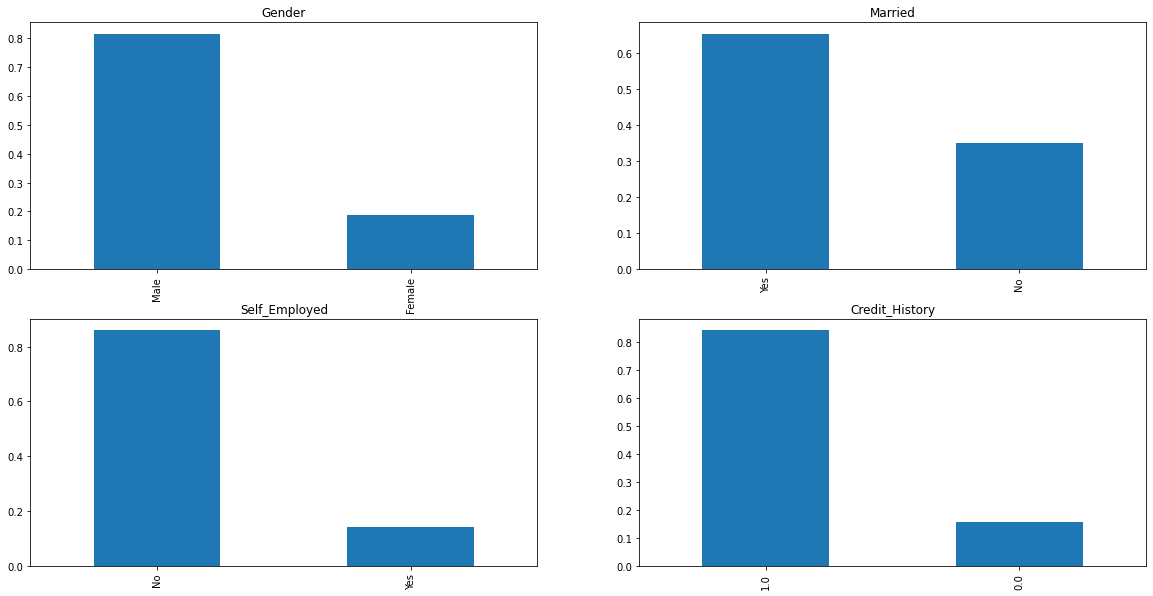

In [5]:
# Univariate analyses. Creates plots and subplots for independent categorical variables
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize= (20,10), title= 'Gender')
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

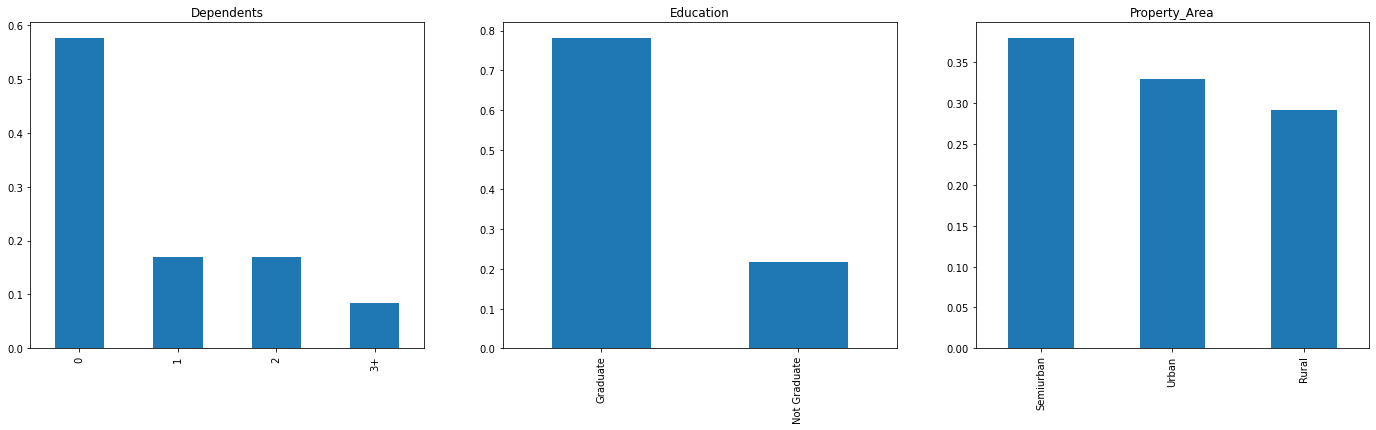

In [6]:
#plotting the independent ordinal variables
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

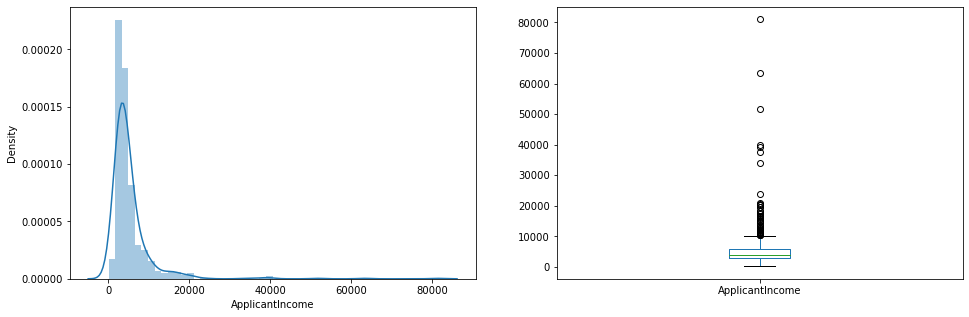

In [7]:
#vizualizing the independent numerical variables
plt.figure(1)
plt.subplot(121)
sns.distplot (train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show

Text(0.5, 0.98, '')

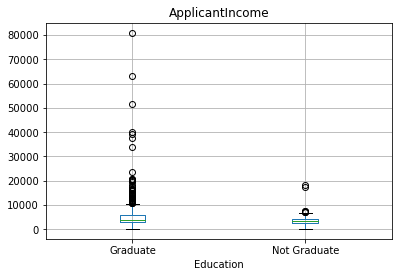

In [8]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')

<function matplotlib.pyplot.show(close=None, block=None)>

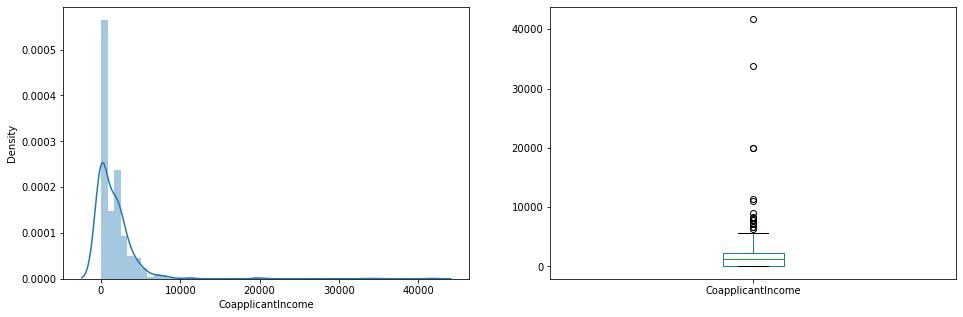

In [9]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show

Text(0.5, 0.98, '')

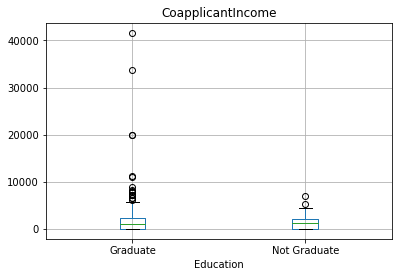

In [10]:
train.boxplot(column='CoapplicantIncome', by='Education')
plt.suptitle('')

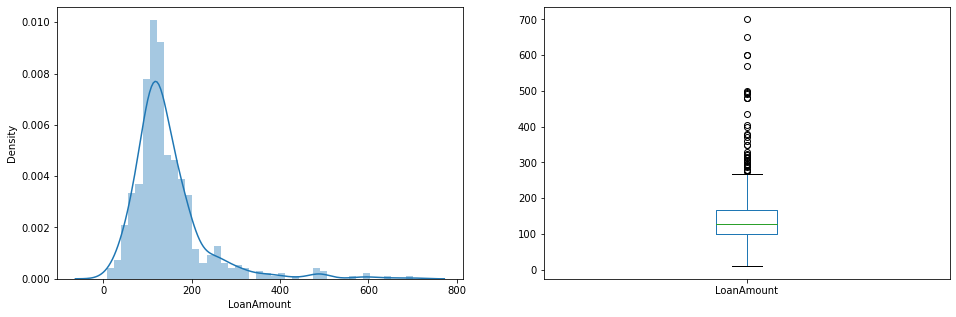

In [11]:
plt.figure(1)
plt.subplot(121)
df=train.dropna() #removes missing values
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:xlabel='Gender'>

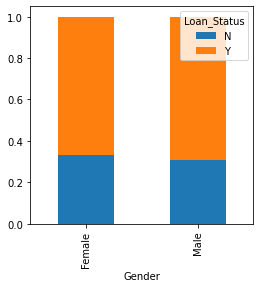

In [12]:
#bivariate analyses of the independent variables vs the target variable
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

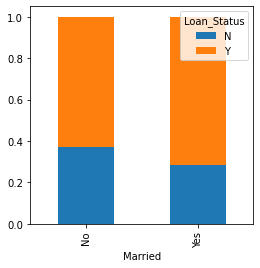

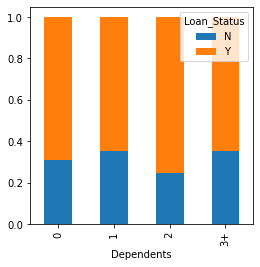

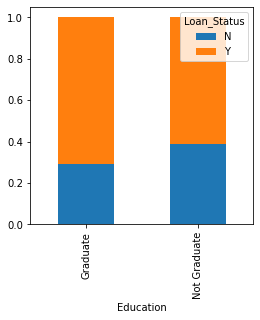

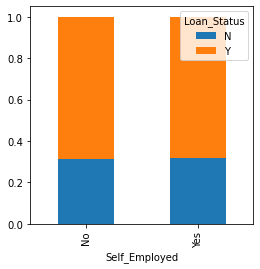

In [13]:
Married=pd.crosstab(train['Married'], train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Education=pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

plt.show() 

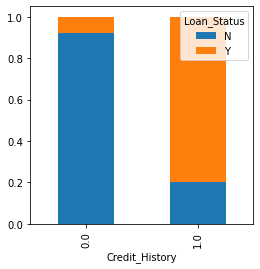

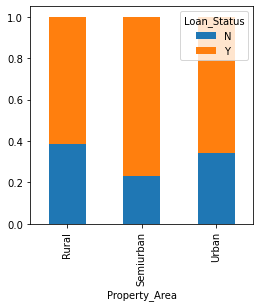

In [14]:
Credit_History=pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'], train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

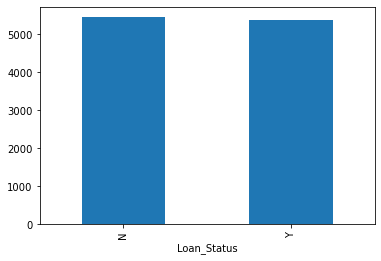

In [15]:
#Applicants income vs target variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

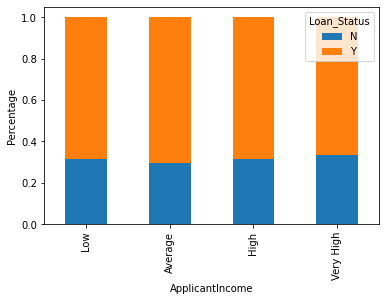

In [16]:
#using bins to group the income of Applicants and measure the correlation with the Target Variable
bins=[0, 2500, 4000, 6000, 81000] 
group=['Low', 'Average', 'High', 'Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show() 

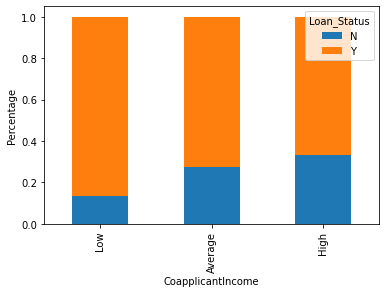

In [17]:
#using bins to group the income of Coapplicants and correlate them to the Target Variable
bins=[0,1000,3000,42000] 
group=['Low', 'Average', 'High']
train['CoapplicantIncome_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

CoapplicantIncome_Income_bin=pd.crosstab(train['CoapplicantIncome_Income_bin'], train['Loan_Status'])
CoapplicantIncome_Income_bin.div(CoapplicantIncome_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

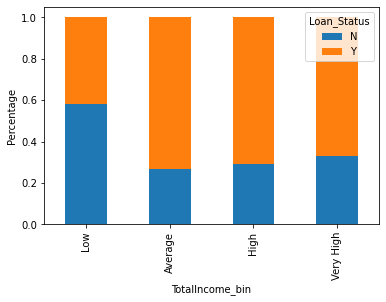

In [18]:
#taking the sum of ApplicantIncome and CoapplicantIncome and correlating against the Target variable
train['TotalIncome']=train['ApplicantIncome'] + train['CoapplicantIncome']
bins=[0, 2500, 4000, 6000, 81000] 
group=['Low', 'Average', 'High', 'Very High']
train['TotalIncome_bin']=pd.cut(train['TotalIncome'], bins, labels=group)
TotalIncome_bin=pd.crosstab(train['TotalIncome_bin'], train['Loan_Status'])
TotalIncome_bin.div(TotalIncome_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel=('TotalIncome')
plt.ylabel('Percentage')
plt.show()

TypeError: 'str' object is not callable

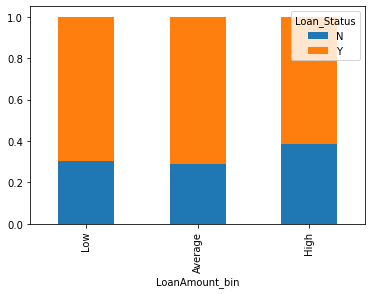

In [20]:
bins=[0,100,200,700] 
group=['Low', 'Average', 'High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

In [21]:
#dropping bins and aggregate, as well as replacing character/alphanumeric symbols with numeric symbols
train=train.drop(['Income_bin','CoapplicantIncome_Income_bin','LoanAmount_bin', 'TotalIncome_bin','TotalIncome'], axis=1) 
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)

train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

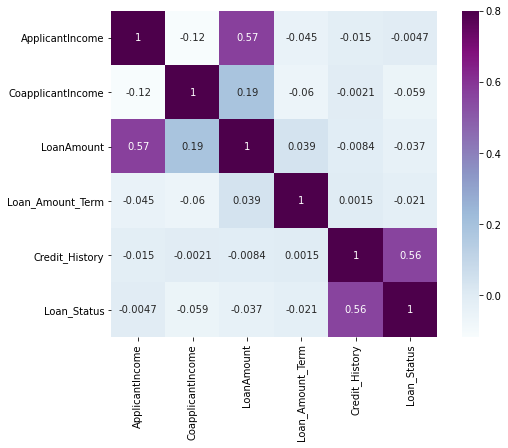

In [22]:
#correlation matrix visualized using a heatmap
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap='BuPu', annot=True);

In [23]:
#listing out missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
#handling missing values in categorical data using mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Married'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [25]:
train['Loan_Amount_Term'].value_counts() #value count of Loan Amount Term

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [26]:
#we use the most appearing number, 360 (mode), to fill the missing values
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

#fill missing values in loan amount with median, mean is not advised as the data has a number of outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [27]:
#check if all missing values have been filled
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
#replacing missing values in test data
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Married'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

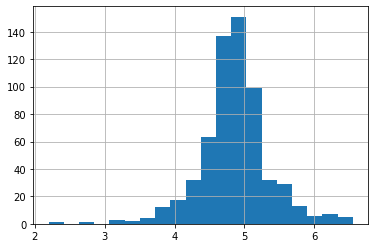

In [29]:
#VIZ-using log transformation to treat outliers in Loan Amount
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount']) 

In [30]:
#dropping the loan id as it is inconsequential to our final outcome
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [31]:
#dropping the target variable and storing it in a different location
X=train.drop('Loan_Status', 1)
y=train.Loan_Status

In [32]:
#converting categorical data in target, test and train data

X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [39]:
#importing train-validation split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv=train_test_split(X,y, test_size=0.20)


In [40]:
#building logistic regression model and importing accuracy score function from sklearn. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#building and fitting the data with the model
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                   intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, 
                   penalty='l2', random_state=1, solver='liblinear', tol=0.0001, 
                   verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [41]:
#predicting the loan status for our validation set and testing its accuracy

pred_cv=model.predict(X_cv)

accuracy_score(y_cv,pred_cv)

0.8048780487804879

In [42]:
#prediction using the test data set
pred_test=model.predict(test)

In [43]:
#importing submission file
submission=pd.read_csv(r'C:\Users\Mayor\Desktop\Projects\Loan Prediction Problem\sample_submission_49d68Cx.csv')

In [44]:
#populating the columns with Loan status of the predicted value and loan ID
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [45]:
#converting the the Loan status values back to their original alphabetic form
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [46]:
#converting prediction document to csv file
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [47]:
#importing stratified k fold
from sklearn.model_selection import StratifiedKFold

In [48]:
#cross validation logistic model with stratified k folds
i=1
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    i=i+1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.8032786885245902


TypeError: 'str' object is not callable

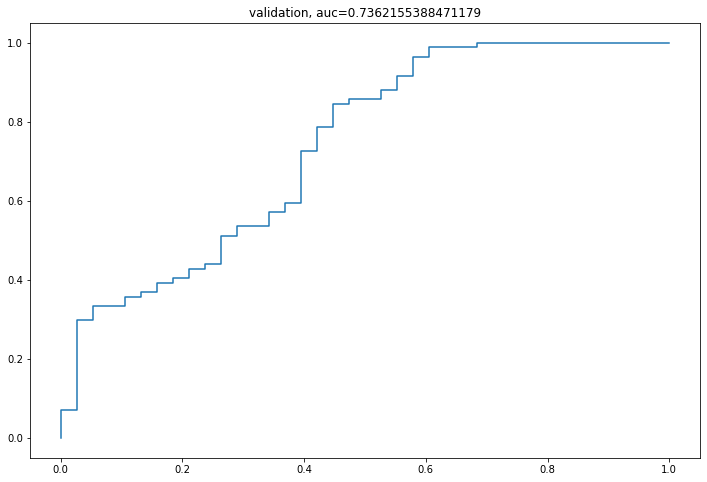

In [50]:
#plotting the AUROC curve to evaluate the model accuracy
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred) 
auc=metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr)
plt.title("validation, auc="+ str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [51]:
#Storing StratifiedKFold test output in submission file
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [52]:
#Converting numeric output back to character format
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [53]:
#Converting file format to CSV
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic.csv')